# Energy Data

By: Jakob Cheng, Donny Dutcher, Sophia Huang, Kaitlyn Ip

**Sources:**
* Dataset report: https://tarjomefa.com/wp-content/uploads/2017/04/6453-English-TarjomeFa.pdf

* Definitions:
  - Glazing Area - https://up.codes/d/glazing-area
  - Relative Compactness - https://publications.ibpsa.org/proceedings/bs/2003/papers/bs2003_1025_1032.pdf

## Sections in this Notebook

* [Imports](#scrollTo=Imports)
* [Introduction](#scrollTo=Introduction)
* [Data](#scrollTo=Data)
* [Analysis](#scrollTo=Analysis)
* [Conclusion](#scrollTo=Conclusion)



---



## 0. Imports
---

In [1]:
# Loading in basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Installing UMAP
!pip install 'umap-learn==0.3.10'
import umap
import seaborn.objects as so

# Library including linear/logistic regression
import statsmodels.api as sm

# Scikit-learn machine learning imports
from sklearn.tree import *
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38861 sha256=095b185105bbcf03b895a2b795dcc71f9089e5e432e03f5eb3debde330838f88
  Stored in directory: /root/.cache/pip/wheels/fa/7c/c0/f6b5434510bef2e044d9c2e81f2f204c85b1412e85a90a16aa
Successfully built umap-learn


## 1. Introduction
---

###Team Perspective and Overall Goals

We plan to discuss the growing attention on energy performance in buildings (EPB) due to environmental concerns, specifically in Europe where there are legal mandates for energy efficiency. From this, we decided our imagined position would be to be hired by architects in Europe to find ways to improve energy efficiency in buildings. We will address how to alleviate the increasing demand for additional energy supply by having more energy efficient building designs with improved energy conservation properties.

###Our Dataset and Analysis Approach

This data was recorded by Athanasios Tsanas and Angeliki Xifara. The data was collected by Tsanas and Xifara performing energy analysis using 12 different building shapes in Ecotect. They simulated various settings with different parameters to get 768 building shapes. Therefore, the dataset contains 768 samples with 8 features that are trying to predict 2 responses, which make 10 columns total.

We will use multiple methods and approaches to explore our dataset. Specifically, to evaluate the strength of association between each input variable (the building design features) and the output variables (HL and CL), we will use data visualization, UMAP, linear regression, and decision trees to answer our research questions.

### Research Questions

To help reach our goal, here are some questions we want to investigate:

1. How does relative compactness relate to heating and cooling loads? (Data Visualization)
2. Do similar building characters cluster together based on the heating and cooling load profiles? (UMAP)
3. How accurately can we predict the necessary heating energy and cooling energy for comfortable indoor conditions with the data on the feature layers? (Linear Regression)
4. Which features most strongly influence heating and cooling loads? (Decision Tree)

## 2. Data
---

###What the Columns Represent

Starting off, we chose to simply rename the columns to the appropriate features or predicted responses. We have 8 features, which were originally X1 - X8:

  - Relative compactness (X1): *Numeric* - The volume to surface area ratio, compared to that of the most compact shape with the same volume

  - Surface area (X2): *Numeric* - Total surface area of the floor, walls, and roof of a building

  - Wall area (X3): *Numeric* - Surface area of the walls, in square meters

  - Roof area (X4): *Numeric* - Surface area of the roof, in square meters

  - Overall height (X5): *Numeric* - Height of the building, in meters

  - Orientation (X6): *Categorical* - The orientation of the building itself relative to the suns path, changes the buildings exposure to direct solar radiation (https://www.sciencedirect.com/science/article/abs/pii/S037877881000040X?via%3Dihub)

  - Glazing area (X7): *Numeric* - Surface area of the transparent material between the inside and outside of the building (Windows/Doors/Etc.), in square meters

  - Glazing area distribution (X8): *Categorical* - *Likely* The way these transparent objects are setup within the building


  Each of these features has a certain number of possible values, which were used in different combinations to create the 768 different buildings. So while this dataframe does contain continuous data, its not continuous in a tradional sense.
  
  A truly continuous variable takes on an infinite number of values between two endpoints. In our dataset, rather than there being an infinite number of possible values, the research categorized these values.
  
  * The simulation creates different buildings and keeps the dimensions of these buildings the same throughout multiple iterations while only changing how the building is oriented and the window layouts of these buildings. This causes a sort of grouping of the dimension variables (such as “Wall Area” and “Relative Compactness”), making these continuous datatype variables turn into something between categorical and continuous.


   Characteristics like these are used by building designers to estimate the required cooling and heating capacities for the building.

There are also the 2 columns that represent the predicted responses, which were originally Y1 and Y2:
  - Heating load (Y1): *Numeric* - The estimated Heating energy needed for comfortable indoor conditions
  - Cooling load (Y2): *Numeric* - The estimated Cooling energy needed for comfortable indoor conditions

###Dropping Columns

Of our 8 features, we decided to occasionally drop 2 of them, those being Orientation (X6) and Glazing Area Distribution (X8). This was due to the problems that would arise from interpreting their meaning in some instances.

Take the "Orientation" variable for example, the 4 different values in the orientation column each represent a different way the building was oriented in reference to the sun. While we would possibly be able to figure out which of the 4 different orientations has the most substantial effect on the Y1 and Y2 variables, we don't know anything about these different orientations. There isn't clarification about the manner the building is oriented in, or the position of the sun, and without this information we won't be able to perform any meaningful analysis on the Orientation variable.

While Orientation isn't explicitly described however, we can still get value out of the column, potentially seeing if the orientation of a building has an impact on the heating/cooling load required. As a result, we'll be running seperate analysis' with and without this variable, and be doing the same with "Glazing Area Distribution" for similar reasons.

This leaves us with our feature layers:


  - Relative compactness (X1)
  - Surface area (X2)
  - Wall area (X3)
  - Roof area (X4)
  - Overall height (X5)
  - Glazing area (X7)

And our Response Variables:

  - Heating load (Y1)
  - Cooling load (Y2)

In [2]:
energy = pd.read_csv("https://raw.githubusercontent.com/ddutche/EnergyShmenergy/refs/heads/main/Energy_df.csv")
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Renaming for clarity
energy[["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height",
"Orientation","Glazing Area","Glazing Area Distribution","Heating Load","Cooling Load"]] = energy[[
    "X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]]

energy = energy.drop(["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"], axis = 1)

In [4]:
energy["Volume"] = energy["Roof Area"] * energy ["Overall Height"]
energy

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Volume
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,771.75
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,771.75
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,771.75
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,771.75
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,857.50
...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,771.75
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,771.75
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,771.75
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,771.75


In [5]:
# Changing our categorical variables to be an object datatype
energy[["Orientation","Glazing Area Distribution"]] = energy[["Orientation","Glazing Area Distribution"]].astype("object")

In [6]:
energy.dtypes

,0
Relative Compactness,float64
Surface Area,float64
Wall Area,float64
Roof Area,float64
Overall Height,float64
Orientation,object
Glazing Area,float64
Glazing Area Distribution,object
Heating Load,float64
Cooling Load,float64


In [7]:
# Checking for NAs
energy.isna().sum() # 0 NAs

,0
Relative Compactness,0
Surface Area,0
Wall Area,0
Roof Area,0
Overall Height,0
Orientation,0
Glazing Area,0
Glazing Area Distribution,0
Heating Load,0
Cooling Load,0


In [8]:
# Our dataset
energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Volume
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,771.75
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,771.75
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,771.75
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,771.75
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,857.50


## 3. Analysis
---

### 3.1. How does relative compactness relate to heating and cooling loads? (Data Visualization)


In [9]:
energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Volume
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,771.75
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,771.75
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,771.75
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,771.75
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,857.50


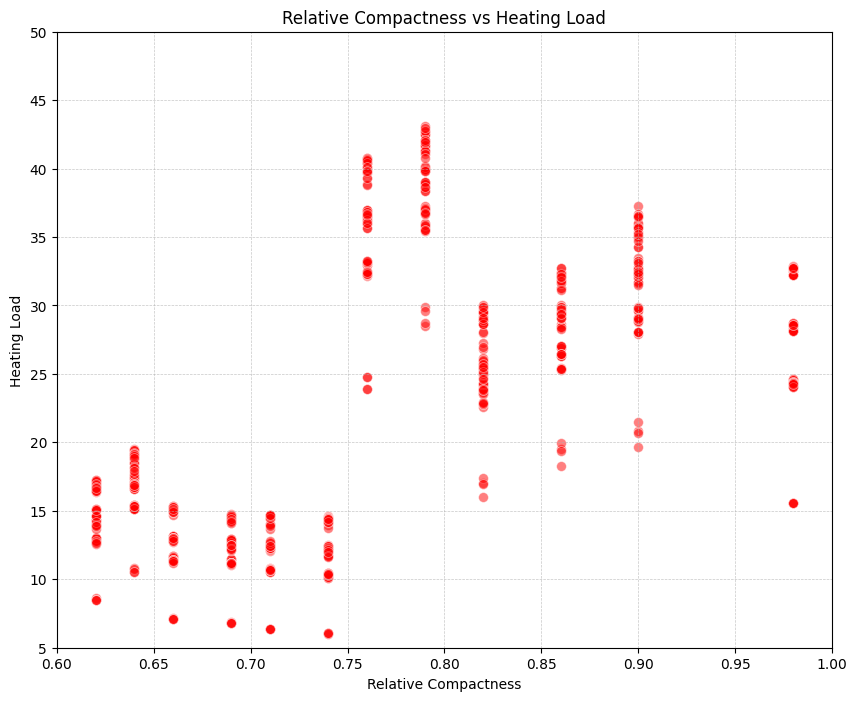

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Relative Compactness', y='Heating Load', data=energy, color='red', s=50, alpha=0.5)
plt.title('Relative Compactness vs Heating Load')
plt.xlabel('Relative Compactness')
plt.ylabel('Heating Load')
plt.xlim(0.6, 1)
plt.ylim(5, 50)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

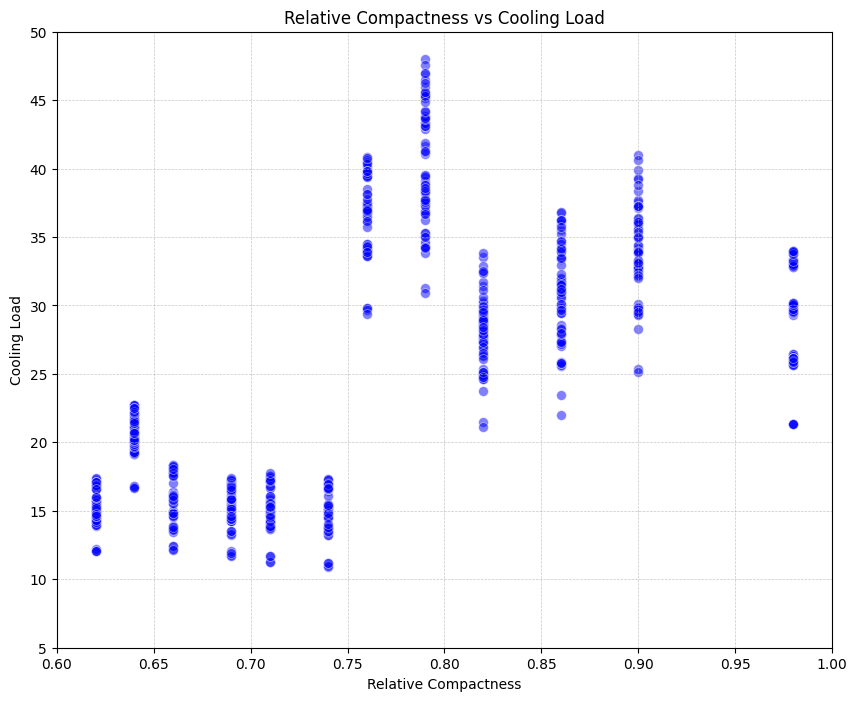

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Relative Compactness', y='Cooling Load', data=energy, color='blue', s=50, alpha=0.5)
plt.title('Relative Compactness vs Cooling Load')
plt.xlabel('Relative Compactness')
plt.ylabel('Cooling Load')
plt.xlim(0.6, 1)
plt.ylim(5, 50)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

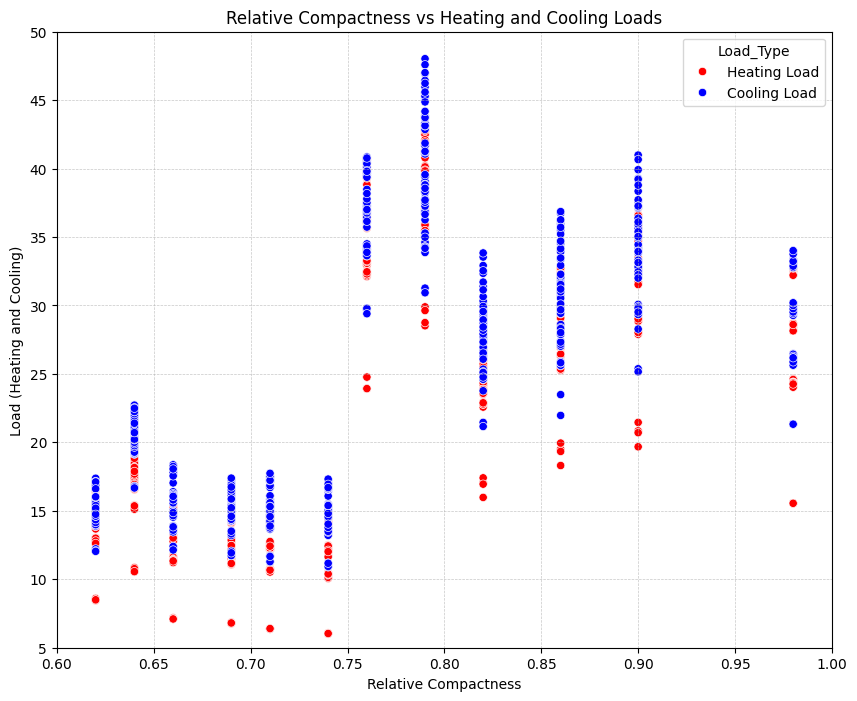

In [12]:
melted_energy = pd.melt(energy, id_vars=['Relative Compactness'], value_vars=['Heating Load', 'Cooling Load'],
                      var_name='Load_Type', value_name='Load')

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Relative Compactness', y='Load', hue='Load_Type', palette = ["Red", "Blue"], data=melted_energy)
plt.title('Relative Compactness vs Heating and Cooling Loads')
plt.xlabel('Relative Compactness')
plt.ylabel('Load (Heating and Cooling)')
plt.xlim(0.6, 1)
plt.ylim(5, 50)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

####**Analysis**

The overall trend for both heating and cooling loads show an increase at intermediate relative compactness and a decrease at high relative compactness.

In this intermediate range, building shapes might deviate from highly efficient forms into elongated, irregular, and overall suboptimal designs, which are less thermally efficient. This can lead to increased heating loss during colder conditions (which can be a cause of higher heating load), and increased cooling loss during warmer conditions (which can be a cause of higher cooling load).

At higher compactness, buildings become more cubical or spherical in shape, which minimizes the surface to volume ratio. This can reduce heating loads and cooling loads respectively as there is less surface area exposed to the environment, creating a more thermally efficient building.

### 3.2. Do similar building characters cluster together based on the heating and cooling load profiles? (UMAP)

In [13]:
energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Volume
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,771.75
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,771.75
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,771.75
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,771.75
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,857.50


In [14]:
X = energy[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height','Glazing Area', 'Orientation', 'Glazing Area Distribution',
       'Volume']]

In [15]:
X = X.dropna()
X = X/X.max()

In [16]:
reducer = umap.UMAP(n_neighbors = 10, min_dist = 0.1)
embedding = reducer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:227: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  warn(


In [17]:
plot_x = embedding[:,0]
plot_y = embedding[:,1]

#### **Heating Load (Including Orientation & Glazing Area Distribution)**

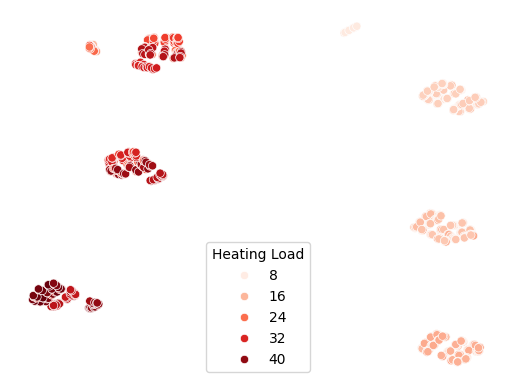

In [18]:
heating = energy["Heating Load"]
sns.scatterplot(x = plot_x, y = plot_y, hue = heating, palette = "Reds")
plt.axis("off")
plt.show()

#### **Cooling Load (Including Orientation & Glazing Area Distribution**)

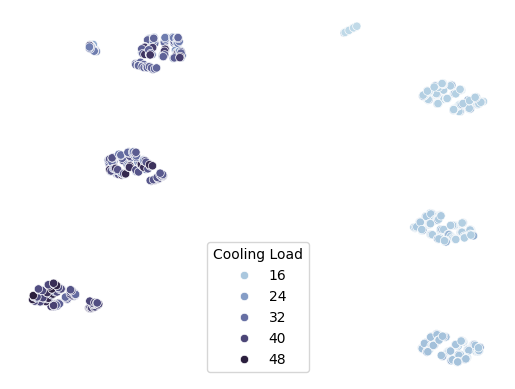

In [19]:
cooling = energy["Cooling Load"]
sns.scatterplot(x = plot_x, y = plot_y, hue = cooling, palette = "ch:s=.25,rot=-.25")
plt.axis("off")
plt.show()

In [20]:
X = X.dropna()

del X["Orientation"]
del X["Glazing Area Distribution"]

X = X/X.max()

In [21]:
X.head(2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Volume
0,1.0,0.636364,0.705882,0.5,1.0,0.0,0.75
1,1.0,0.636364,0.705882,0.5,1.0,0.0,0.75


In [22]:
reducer = umap.UMAP(n_neighbors = 10, min_dist = 0.1)
embedding = reducer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:227: UserWarning: Embedding a total of 40 separate connected components using meta-embedding (experimental)
  warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:181: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [23]:
plot_x = embedding[:,0]
plot_y = embedding[:,1]

#### **Heating Load (Not Including Orientation & Glazing Area Distribution)**

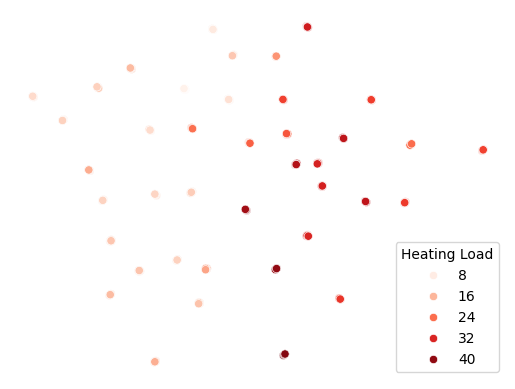

In [24]:
heating = energy["Heating Load"]
sns.scatterplot(x = plot_x, y = plot_y, hue = heating, palette = "Reds")
plt.axis("off")
plt.show()

#### **Cooling Load (Not Including Orientation & Glazing Area Distribution)**

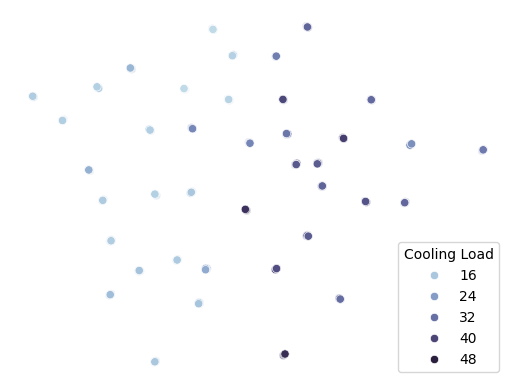

In [25]:
cooling = energy["Cooling Load"]
sns.scatterplot(x = plot_x, y = plot_y, hue = cooling, palette = "ch:s=.25,rot=-.25")
plt.axis("off")
plt.show()

####**Analysis**


When looking at the different UMAP plots, there is different clustering with and without the orientation and glazing area distribution columns. With the two columns included in the data, grouping is more apparent for both the heating and cooling loads. This suggests that similar heating load and cooling load values grouped together are influenced by certain features in the dataset. In the UMAP plots without the orientation and glazing area distribution columns, clustering does not appear; rather, the points are dispersed throughout the UMAP. The absence of the two variables has reduced the distinct boundaries between the clusters. However, the higher values of both the cooling and heating loads cluster with each other, along with the lower values.

With this information, we can make inferences that including orientation and glazing area distribution in the dataset are necessary for analysis.




### 3.3. How accurately can we predict the necessary heating energy and cooling energy for comfortable indoor conditions with the data on the feature layers? (Regression)

In [26]:
energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Volume
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,771.75
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,771.75
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,771.75
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,771.75
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,857.50


#### **Heating Load (Including Orientation & Glazing Area Distribution)**

In [27]:
X = energy[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution','Volume']]
X = pd.get_dummies(X, drop_first=False).astype("float32")

y = energy["Heating Load"].astype("float32")

X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     706.0
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:03:31   Log-Likelihood:                -1874.5
No. Observations:                 768   AIC:                             3777.
Df Residuals:                     754   BIC:                             3842.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [28]:
yhat = model.predict()
residuals = y - yhat
np.std(residuals)

2.7783542988289405

#### **Heating Load (Not Including Orientation & Glazing Area Distribution)**

In [29]:
X = energy[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height','Glazing Area','Volume']]
X = pd.get_dummies(X, drop_first=False).astype("float32")
X = (X-X.mean())/X.std() #Normalizing our X variables

y = energy["Heating Load"].astype("float32")

X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1181.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:03:32   Log-Likelihood:                -1914.4
No. Observations:                 768   AIC:                             3845.
Df Residuals:                     760   BIC:                             3882.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   26.3878 

In [30]:
yhat = model.predict()
residuals = y - yhat
np.std(residuals)

2.9263957494917947

#### **Cooling Load (Including Orientation & Glazing Area Distribution**)

In [31]:
X = energy[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution','Volume']]
X = pd.get_dummies(X, drop_first=False).astype("float32")


y = energy["Cooling Load"]

X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     471.3
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:03:32   Log-Likelihood:                -1970.3
No. Observations:                 768   AIC:                             3969.
Df Residuals:                     754   BIC:                             4034.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [32]:
yhat = model.predict()
residuals = y - yhat
np.std(residuals)

3.14723324295963

Text(0, 0.5, 'Residuals')

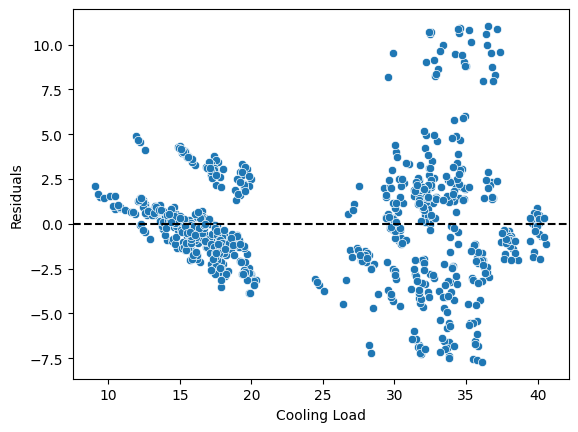

In [33]:
ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Cooling Load")
plt.ylabel("Residuals")

#### **Cooling Load (Not Including Orientation & Glazing Area Distribution)**

In [34]:
X = energy[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height','Glazing Area','Volume']]
X = pd.get_dummies(X, drop_first=False).astype("float32")
X = (X-X.mean())/X.std() #Normalizing our X variables

y = energy["Cooling Load"]

X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     915.8
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:03:32   Log-Likelihood:                -1957.4
No. Observations:                 768   AIC:                             3931.
Df Residuals:                     760   BIC:                             3968.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   37.5035 

In [35]:
yhat = model.predict()
residuals = y - yhat
np.std(residuals)

3.0950644822044104

Text(0, 0.5, 'Residuals')

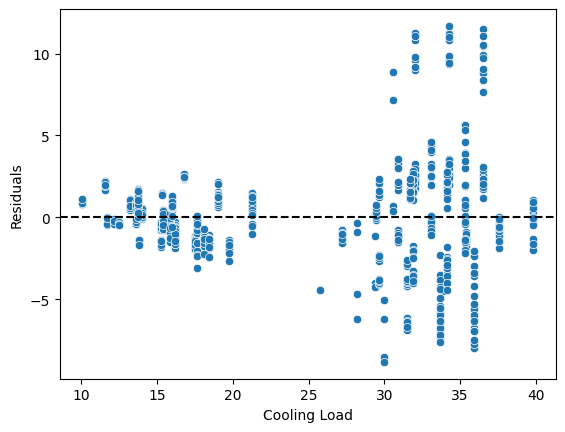

In [36]:
ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Cooling Load")
plt.ylabel("Residuals")

####**Analysis**

These models were characterized by whether they included the orientation and glazing area distribution variables, each predicting either the heating or cooling load. This created 4 models, all with similar residual errors between 2.7 and 3.15. These models tended to be more accurate when including the orientation and glazing area variables, with our cooling load model utilizing these variables as the most accurate. However, when looking at a graph of our residuals, we can see a wavy trend in the points instead of a more favorable constant spread centered around 0. This indicates that there might be better choices than linear regression when generating accurate predictions for these heating and cooling load values. These plots are a reflection of the handpicked simulation data values and likely would have a more favorable spread if these values were more “traditionally continuous.”

### 3.4. Which features most strongly influence heating and cooling loads? (Random Forest)

#### **Cooling Load**

In [37]:
X = energy[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height','Glazing Area', 'Orientation', 'Glazing Area Distribution',
       'Volume']]
X = pd.get_dummies(X, drop_first=False).astype("float32")


y = energy["Cooling Load"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)
model = RandomForestRegressor(max_depth = 5).fit(X_train, y_train) #have to pass max_depth to prevent overfitting

In [38]:

yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#getting a null version of the mean squared error by predicting the average constantly

mean = y_test.mean()
null = y_test
for i in null:
  null = null.replace(i,mean)

print(f"Train MAPE: {mean_absolute_percentage_error(y_train, yhat_train):.2f}")
print(f"Test MAPE: {mean_absolute_percentage_error(y_test, yhat_test):.2f}")
print(f"Null MAPE: {mean_absolute_percentage_error(null,yhat_test):.2f}")

Train MAPE: 0.04
Test MAPE: 0.04
Null MAPE: 0.35


<Axes: xlabel='importance', ylabel='feature'>

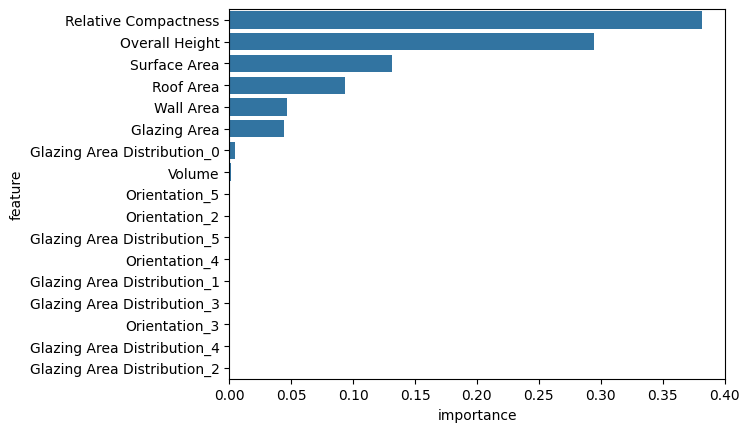

In [39]:
data = {"feature":X.columns, "importance":model.feature_importances_}
df = pd.DataFrame(data)
df = df.sort_values(by="importance", ascending=False)
sns.barplot(data = df, x="importance", y="feature")


#### **Heating Load**

In [40]:
X = energy[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height','Glazing Area', 'Orientation', 'Glazing Area Distribution',
       'Volume']]
X = pd.get_dummies(X, drop_first=False).astype("float32")


y = energy["Heating Load"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)
model = RandomForestRegressor(max_depth = 5).fit(X_train, y_train) #have to pass max_depth to prevent overfitting

In [41]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#getting a null version of the mean squared error by predicting the average constantly

mean = y_test.mean()
null = y_test
for i in null:
  null = null.replace(i,mean)

print(f"Train MAPE: {mean_absolute_percentage_error(y_train, yhat_train):.2f}")
print(f"Test MAPE: {mean_absolute_percentage_error(y_test, yhat_test):.2f}")
print(f"Null MAPE: {mean_absolute_percentage_error(null,yhat_test):.2f}")

Train MAPE: 0.02
Test MAPE: 0.03
Null MAPE: 0.42


<Axes: xlabel='importance', ylabel='feature'>

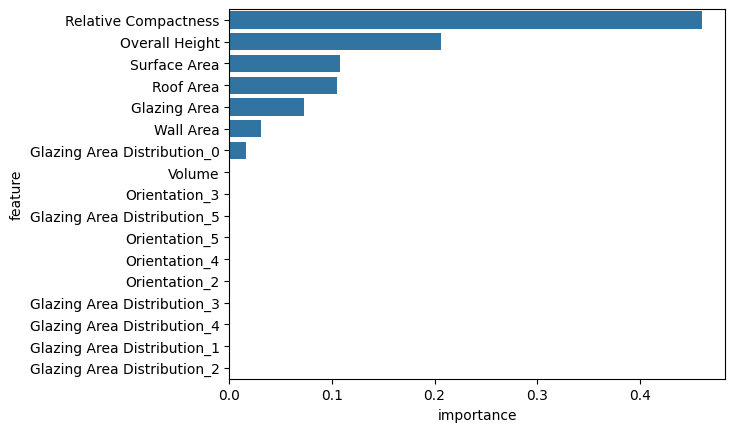

In [42]:
data = {"feature":X.columns, "importance":model.feature_importances_}
df = pd.DataFrame(data)
df = df.sort_values(by="importance", ascending=False)
sns.barplot(data = df, x="importance", y="feature")

####**Analysis**

We used Random Forests to eventually predict feature importances. Since we're seeing how important these individual features are on their own, we can leave in both "Orientation" and "Glazing Area Distribution" for this analysis.

For predicting the forests' accuracy, we used Mean Absolute Percentage Error, a human readable metric for Random Forest Regressors like these above. Our Heating Load model came back with

You interpret these importances relative to one another. For example, if feature "A" has an importance of 0.1 and feature "B" has 0.05, then feature A is twice as important as feature "B".

## 4. Conclusion
---

To fall within Europe’s Legal mandates for energy efficiency in buildings, we aimed to determine which building design features are most impactful regarding energy expenditures. For our first question, we used data visualization to find a trend for both heating and cooling loads, showing an increase at intermediate relative compactness and a decrease at high relative compactness. With our second question, we discovered through the use of UMAP that we can infer that including orientation and glazing area distribution in the dataset is necessary for analysis. With our third question, we performed linear regression analysis to create a model to predict the heating and cooling loads based on our feature values. These models performed slightly better when including the orientation and glazing area distribution, with marginally lower residual errors. Finally, with our fourth question, we used random forests to create models that can be used for variable importance analysis. From these models, we discovered relative compactness was the most crucial variable for predicting heating and cooling load, with overall height being nearly as predictive as relative compactness when it comes to predicting cooling load and, to a lesser degree, still the second most important variable for predicting heating load.

Speaking towards the effectiveness of our analysis, our methods were effective in finding the answers to our research questions. However, in hindsight, using linear regression was not the best choice for our third question. Looking at the residual plots for each of the regression models we create, it is hard to conclude it because there is a downward trend rather than being centered at 0. Based on this interpretation, we determined that linear regression may not be the best model for predicting heating and cooling loads. Instead, a better choice would be random foresting, which we used for our fourth research question.

In terms of missing data from the dataset that offered a more in-depth and accurate analysis, we would have liked to have an explanation for glazing area distribution and orientation. With the orientation variable, for example, the 4 different values in the orientation column each represent a different way the building was oriented about the sun. While we would possibly be able to figure out which of the 4 different orientations has the most substantial effect on the heating and cooling loads, we don’t have any information on these various orientations. There isn’t any clarification about how the building is oriented or the sun's position. Without this information, we could not statistically analyze the orientation variable. The same goes for glazing area distribution; without any background information, we cannot make a substantial conclusion utilizing the information from this variable.